### Import neccessary libraries

In [294]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.pipeline import Pipeline

import warnings 
warnings.filterwarnings('ignore')

%matplotlib inline

#### Read data from csv file

In [295]:
df = pd.read_csv('../../data/processed/canomical_data.csv')
df.head()

,p_categories,p_brand,p_day_created,p_sold_quantity,p_original_price,p_discount_rate
0,7,155,659.0,702,528000,49
1,84,198,974.0,12844,799000,46
2,84,192,1372.0,938,209000,0
3,7,155,593.0,10359,473000,50
4,15,145,529.0,2338,106000,16


#### Train test split

In [296]:
X = df.drop('p_sold_quantity', axis='columns')
y = testLabels = df.p_sold_quantity

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)

#### Create pipeline

In [297]:
# Create a pipeline
pipe = Pipeline([('scaler', StandardScaler()), ('linear', LinearRegression())])
param_grid = {'linear__fit_intercept': [True, False], 'linear__normalize': [True, False]}

In [298]:
# use grid search to test all values for n_neighbors 
gr_search = GridSearchCV(pipe, param_grid, cv=10, scoring='neg_mean_squared_error')
gr_search.fit(X_train, y_train)
gr_search.best_params_

{'linear__fit_intercept': False, 'linear__normalize': True}

#### Train model

In [299]:
linear_fit_intercept, linear_normalize = gr_search.best_params_.get('linear__fit_intercept'), gr_search.best_params_.get('linear__normalize')
model = LinearRegression(fit_intercept=linear_fit_intercept, normalize=linear_normalize)
model.fit(X_train, y_train)

LinearRegression(fit_intercept=False, normalize=True)

#### Predict on test data

In [300]:
y_pred = model.predict(X_test)

#### Visualize the results 

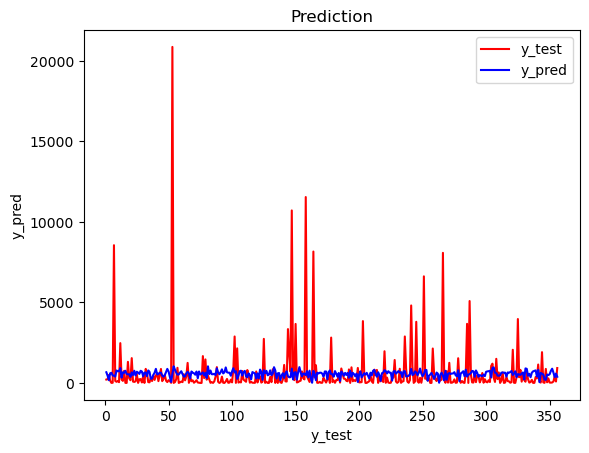

In [301]:
plot_predict = [i for i in range (1, len(y_test) + 1, 1)]
plt.plot(plot_predict,y_test, color='red', linestyle='-')
plt.plot(plot_predict,y_pred, color='blue', linestyle='-')
plt.legend(['y_test', 'y_pred'])
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.title('Prediction')
plt.show()

#### Plot error distribution

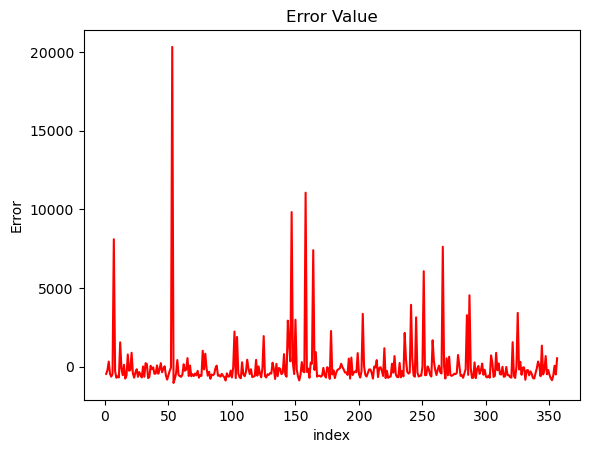

In [302]:
plot_error = [i for i in range(1, len(y_test) + 1, 1)]
plt.plot(plot_error, y_test - y_pred, color='red', linestyle='-')
plt.xlabel('index')
plt.ylabel('Error')
plt.title('Error Value')
plt.show()

#### Evaluate model based on 

In [303]:
print('MSE:', mean_squared_error(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

MSE: 2979927.108555989
MAE: 733.6665041091812
RMSE: 1726.2465375942072


#### Result best estimator intercept and coefficients

In [304]:
print('Intercept of the model:',gr_search.best_estimator_.named_steps['linear'].intercept_)
print('Coefficient of the line:',gr_search.best_estimator_.named_steps['linear'].coef_)

Intercept of the model: 0.0
Coefficient of the line: [-37.70762507 -17.93385493   6.78694755]
